# Vulnerability Fix Dataset Analysis

This notebook provides a comprehensive analysis of the vulnerability fix dataset, including:
- Basic dataset information and structure
- Statistical summaries
- Data quality assessment
- Column exploration and insights

## Dataset Overview
The dataset contains information about vulnerability fixes and related data points.

## 1. Import Required Libraries

In [1]:
# Import required libraries for data analysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import warnings

# Configure display options for better output
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', 100)

# Ignore warnings for cleaner output
warnings.filterwarnings('ignore')

print("✅ Libraries imported successfully!")
print(f"Pandas version: {pd.__version__}")
print(f"NumPy version: {np.__version__}")

✅ Libraries imported successfully!
Pandas version: 2.3.2
NumPy version: 2.3.2


## 2. Load the Dataset

In [2]:
# Load the vulnerability fix dataset
file_path = r"D:\ML lab\Ml-Project\new_dataset\vulnerability_fix_dataset.csv"

print("🔍 Loading vulnerability fix dataset...")
print("-" * 50)

try:
    # Load the CSV file
    df = pd.read_csv(file_path)
    
    print(f"✅ Dataset loaded successfully!")
    print(f"📊 Dataset shape: {df.shape[0]:,} rows × {df.shape[1]} columns")
    print(f"💾 Memory usage: {df.memory_usage(deep=True).sum() / 1024**2:.2f} MB")
    
except Exception as e:
    print(f"❌ Error loading dataset: {e}")
    df = None

🔍 Loading vulnerability fix dataset...
--------------------------------------------------
✅ Dataset loaded successfully!
📊 Dataset shape: 35,000 rows × 3 columns
💾 Memory usage: 59.82 MB


## 3. Display Basic Dataset Information

In [4]:
# Display basic information about the dataset
print("📋 BASIC DATASET INFORMATION")
print("=" * 50)

if df is not None:
    # Display general info
    df.info(memory_usage='deep')
else:
    print("❌ Dataset not loaded. Please check the file path.")

📋 BASIC DATASET INFORMATION
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35000 entries, 0 to 34999
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   vulnerability_type  35000 non-null  object
 1   vulnerable_code     35000 non-null  object
 2   fixed_code          35000 non-null  object
dtypes: object(3)
memory usage: 59.8 MB


## 4. Show Dataset Shape and Structure

In [5]:
# Display dataset shape and structure
print("📊 DATASET SHAPE AND STRUCTURE")
print("=" * 50)

if df is not None:
    print(f"Number of rows: {df.shape[0]:,}")
    print(f"Number of columns: {df.shape[1]:,}")
    print(f"Total data points: {df.shape[0] * df.shape[1]:,}")
    print(f"Dataset dimensions: {df.shape}")
    
    # Calculate total memory usage
    total_memory = df.memory_usage(deep=True).sum()
    print(f"Total memory usage: {total_memory / 1024**2:.2f} MB")
    
    # Check if dataset is empty
    if df.empty:
        print("⚠️ Warning: Dataset is empty!")
    else:
        print(f"✅ Dataset contains data")
else:
    print("❌ Dataset not loaded.")

📊 DATASET SHAPE AND STRUCTURE
Number of rows: 35,000
Number of columns: 3
Total data points: 105,000
Dataset dimensions: (35000, 3)
Total memory usage: 59.82 MB
✅ Dataset contains data


## 5. Display Column Names and Data Types

In [6]:
# Display column names and data types
print("📋 COLUMN NAMES AND DATA TYPES")
print("=" * 50)

if df is not None:
    print(f"Total columns: {len(df.columns)}")
    print("\nColumn details:")
    print("-" * 50)
    
    # Display each column with its data type
    for i, (col, dtype) in enumerate(df.dtypes.items(), 1):
        null_count = df[col].isnull().sum()
        null_percentage = (null_count / len(df)) * 100
        print(f"{i:2d}. {col:<30} | {str(dtype):<12} | Nulls: {null_count:,} ({null_percentage:.1f}%)")
    
    # Summary of data types
    print(f"\nData type summary:")
    print("-" * 30)
    dtype_counts = df.dtypes.value_counts()
    for dtype, count in dtype_counts.items():
        print(f"{dtype}: {count} columns")
        
else:
    print("❌ Dataset not loaded.")

📋 COLUMN NAMES AND DATA TYPES
Total columns: 3

Column details:
--------------------------------------------------
 1. vulnerability_type             | object       | Nulls: 0 (0.0%)
 2. vulnerable_code                | object       | Nulls: 0 (0.0%)
 3. fixed_code                     | object       | Nulls: 0 (0.0%)

Data type summary:
------------------------------
object: 3 columns


## 6. Show First Few Rows

In [7]:
# Display first few rows of the dataset
print("📄 FIRST FEW ROWS OF THE DATASET")
print("=" * 50)

if df is not None:
    print("First 5 rows:")
    print("-" * 30)
    display(df.head())
    
    print(f"\nLast 5 rows:")
    print("-" * 30)
    display(df.tail())
    
    # Show a random sample if dataset is large
    if len(df) > 1000:
        print(f"\nRandom sample (5 rows):")
        print("-" * 30)
        display(df.sample(5))
        
else:
    print("❌ Dataset not loaded.")

📄 FIRST FEW ROWS OF THE DATASET
First 5 rows:
------------------------------


,vulnerability_type,vulnerable_code,fixed_code
0,SQL Injection,import java.sql.*;\n\npublic class SQLInjectionVulnerable {\n public static void main(String[...,import java.sql.*;\n\npublic class SQLInjectionSecure {\n public static void main(String[] ar...
1,SQL Injection,import java.sql.*;\n\npublic class VulnerableSQLInjection {\n public static void main(String[...,import java.sql.*;\n\npublic class SecureSQLInjection {\n public static void main(String[] ar...
2,SQL Injection,import java.sql.*;\n\npublic class SQLInjectionExample {\n\n public static void main(String[]...,"To prevent SQL Injection attacks in the provided Java code snippet, you should use parameterized..."
3,SQL Injection,import java.sql.Connection;\nimport java.sql.DriverManager;\nimport java.sql.ResultSet;\nimport ...,"To fix the SQL Injection vulnerability in the given Java code, you should use prepared statement..."
4,SQL Injection,import java.sql.*;\n\npublic class VulnerableCode {\n public static void main(String[] args) ...,import java.sql.*;\n\npublic class SecureCode {\n public static void main(String[] args) {\n ...



Last 5 rows:
------------------------------


,vulnerability_type,vulnerable_code,fixed_code
34995,Buffer Overflow,import java.util.Scanner;\n\npublic class BufferOverflowVulnerability {\n\n public static voi...,import java.util.Scanner;\n\npublic class SecureBufferInput {\n\n public static void main(Str...
34996,Buffer Overflow,import java.util.Scanner;\n\npublic class BufferOverflowVulnerability {\n public static void ...,import java.util.Scanner;\n\npublic class SafeBufferHandling {\n public static void main(Stri...
34997,Buffer Overflow,import java.util.Scanner;\n\npublic class BufferOverflowVulnerability {\n public static void ...,import java.util.Scanner;\n\npublic class SecureBuffer {\n public static void main(String[] a...
34998,Buffer Overflow,import java.util.Scanner;\n\npublic class BufferOverflowVulnerability {\n public static void ...,import java.util.Scanner;\n\npublic class SecureBufferUsage {\n public static void main(Strin...
34999,Buffer Overflow,import java.util.Scanner;\n\npublic class BufferOverflowExample {\n public static void main(S...,import java.util.Scanner;\n\npublic class SecureBufferHandlingExample {\n public static void ...



Random sample (5 rows):
------------------------------


,vulnerability_type,vulnerable_code,fixed_code
16939,Cross-Site Scripting (XSS),import java.io.*;\nimport javax.servlet.*;\nimport javax.servlet.http.*;\n\npublic class Vulnera...,import java.io.*;\nimport javax.servlet.*;\nimport javax.servlet.http.*;\n\nimport org.owasp.esa...
19105,Buffer Overflow,import java.util.Scanner;\n\npublic class BufferOverflowExample {\n\n public static void main...,import java.util.Scanner;\n\npublic class SecureBufferExample {\n\n public static void main(S...
2093,Command Injection,import java.io.BufferedReader;\nimport java.io.IOException;\nimport java.io.InputStreamReader;\n...,"To fix the Command Injection vulnerability in the given Java code snippet, you need to validate ..."
18988,Path Traversal,import java.io.File;\nimport java.io.FileInputStream;\nimport java.io.IOException;\n\npublic cla...,"To fix the Path Traversal vulnerability in the provided Java code snippet, you can validate the ..."
7597,SQL Injection,import java.sql.*;\n\npublic class SQLInjectionVulnerableExample {\n public static void main(...,import java.sql.*;\n\npublic class SecureSQLInjectionExample {\n public static void main(Stri...


## 7. Generate Dataset Statistics

In [8]:
# Generate statistical summary of the dataset
print("📊 DATASET STATISTICAL SUMMARY")
print("=" * 50)

if df is not None:
    # Statistics for numerical columns
    numeric_cols = df.select_dtypes(include=[np.number]).columns
    
    if len(numeric_cols) > 0:
        print(f"📈 Numerical columns ({len(numeric_cols)}):")
        print("-" * 40)
        display(df[numeric_cols].describe())
        
        # Additional statistics
        print(f"\nAdditional numerical statistics:")
        print("-" * 40)
        for col in numeric_cols:
            print(f"{col}:")
            print(f"  - Variance: {df[col].var():.4f}")
            print(f"  - Skewness: {df[col].skew():.4f}")
            print(f"  - Kurtosis: {df[col].kurtosis():.4f}")
    else:
        print("No numerical columns found.")
    
    # Statistics for categorical/text columns
    categorical_cols = df.select_dtypes(include=['object']).columns
    
    if len(categorical_cols) > 0:
        print(f"\n📝 Categorical columns ({len(categorical_cols)}):")
        print("-" * 40)
        for col in categorical_cols[:3]:  # Show first 3 categorical columns
            print(f"\n{col}:")
            print(f"  - Unique values: {df[col].nunique():,}")
            print(f"  - Most frequent: {df[col].mode().iloc[0] if not df[col].mode().empty else 'N/A'}")
            print(f"  - Top 5 values:")
            top_values = df[col].value_counts().head(5)
            for value, count in top_values.items():
                percentage = (count / len(df)) * 100
                print(f"    • {value}: {count:,} ({percentage:.1f}%)")
    else:
        print("No categorical columns found.")
        
else:
    print("❌ Dataset not loaded.")

📊 DATASET STATISTICAL SUMMARY
No numerical columns found.

📝 Categorical columns (3):
----------------------------------------

vulnerability_type:
  - Unique values: 6
  - Most frequent: Cross-Site Scripting (XSS)
  - Top 5 values:
    • Cross-Site Scripting (XSS): 9,377 (26.8%)
    • SQL Injection: 7,297 (20.8%)
    • Command Injection: 6,947 (19.8%)
    • Path Traversal: 6,500 (18.6%)
    • Buffer Overflow: 3,157 (9.0%)

vulnerable_code:
  - Unique values: 29,602
  - Most frequent: No response generated.
  - Top 5 values:
    • No response generated.: 2,507 (7.2%)
    • import java.io.*;
import javax.servlet.*;
import javax.servlet.http.*;

public class VulnerableServlet extends HttpServlet {
    protected void doGet(HttpServletRequest request, HttpServletResponse response) throws ServletException, IOException {
        String userInput = request.getParameter("input");
        String output = "Hello, " + userInput + "!";

        PrintWriter out = response.getWriter();
        out.p

## 8. Check for Missing Values

In [9]:
# Check for missing values in the dataset
print("🔍 MISSING VALUES ANALYSIS")
print("=" * 50)

if df is not None:
    # Calculate missing values
    missing_data = df.isnull().sum()
    missing_percentage = (missing_data / len(df)) * 100
    total_missing = missing_data.sum()
    
    # Create missing data summary
    missing_df = pd.DataFrame({
        'Column': missing_data.index,
        'Missing Count': missing_data.values,
        'Missing Percentage': missing_percentage.values
    }).sort_values('Missing Count', ascending=False)
    
    # Display results
    print(f"Total missing values: {total_missing:,}")
    print(f"Total data points: {df.shape[0] * df.shape[1]:,}")
    print(f"Missing data percentage: {(total_missing / (df.shape[0] * df.shape[1])) * 100:.2f}%")
    
    if total_missing > 0:
        print(f"\nColumns with missing values:")
        print("-" * 40)
        missing_cols = missing_df[missing_df['Missing Count'] > 0]
        display(missing_cols)
        
        # Visualize missing data if there are missing values
        if len(missing_cols) <= 20:  # Only plot if reasonable number of columns
            plt.figure(figsize=(12, 6))
            missing_cols_plot = missing_cols.head(15)  # Top 15 columns with missing data
            
            plt.subplot(1, 2, 1)
            plt.barh(missing_cols_plot['Column'], missing_cols_plot['Missing Count'])
            plt.title('Missing Values Count by Column')
            plt.xlabel('Number of Missing Values')
            
            plt.subplot(1, 2, 2)
            plt.barh(missing_cols_plot['Column'], missing_cols_plot['Missing Percentage'])
            plt.title('Missing Values Percentage by Column')
            plt.xlabel('Percentage of Missing Values')
            
            plt.tight_layout()
            plt.show()
            
    else:
        print("\n✅ No missing values found in the dataset!")
        
else:
    print("❌ Dataset not loaded.")

🔍 MISSING VALUES ANALYSIS
Total missing values: 0
Total data points: 105,000
Missing data percentage: 0.00%

✅ No missing values found in the dataset!


## 9. Explore Unique Values in Categorical Columns

In [10]:
# Explore unique values in categorical columns
print("📝 CATEGORICAL COLUMNS EXPLORATION")
print("=" * 50)

if df is not None:
    # Get categorical columns
    categorical_cols = df.select_dtypes(include=['object']).columns
    
    if len(categorical_cols) > 0:
        print(f"Found {len(categorical_cols)} categorical columns:")
        
        for i, col in enumerate(categorical_cols, 1):
            print(f"\n{i}. Column: {col}")
            print("-" * 30)
            
            # Basic statistics
            unique_count = df[col].nunique()
            total_count = df[col].count()
            print(f"   Unique values: {unique_count:,}")
            print(f"   Total non-null values: {total_count:,}")
            
            # Show value counts for columns with reasonable number of unique values
            if unique_count <= 50:
                print(f"   Value distribution:")
                value_counts = df[col].value_counts().head(10)
                for j, (value, count) in enumerate(value_counts.items(), 1):
                    percentage = (count / total_count) * 100
                    # Truncate long values
                    display_value = str(value)[:50] + '...' if len(str(value)) > 50 else str(value)
                    print(f"     {j:2d}. {display_value}: {count:,} ({percentage:.1f}%)")
                    
                if len(value_counts) < unique_count:
                    print(f"     ... and {unique_count - len(value_counts)} more unique values")
                    
            elif unique_count <= 1000:
                print(f"   Top 10 most frequent values:")
                value_counts = df[col].value_counts().head(10)
                for j, (value, count) in enumerate(value_counts.items(), 1):
                    percentage = (count / total_count) * 100
                    display_value = str(value)[:50] + '...' if len(str(value)) > 50 else str(value)
                    print(f"     {j:2d}. {display_value}: {count:,} ({percentage:.1f}%)")
            else:
                print(f"   Too many unique values to display (showing sample):")
                sample_values = df[col].dropna().unique()[:10]
                for j, value in enumerate(sample_values, 1):
                    display_value = str(value)[:50] + '...' if len(str(value)) > 50 else str(value)
                    print(f"     {j:2d}. {display_value}")
                    
            # Show some example values if they're long text
            max_length = df[col].astype(str).str.len().max()
            if max_length > 100:
                print(f"   Max text length: {max_length} characters")
                long_examples = df[col].astype(str).str.len().nlargest(3)
                print(f"   Examples of longer entries:")
                for idx in long_examples.index[:2]:
                    example = str(df.loc[idx, col])[:150] + '...' if len(str(df.loc[idx, col])) > 150 else str(df.loc[idx, col])
                    print(f"     • {example}")
            
            # Stop after showing first 5 columns to avoid too much output
            if i >= 5:
                remaining = len(categorical_cols) - 5
                if remaining > 0:
                    print(f"\n... and {remaining} more categorical columns")
                break
                
    else:
        print("No categorical columns found in the dataset.")
        
else:
    print("❌ Dataset not loaded.")

📝 CATEGORICAL COLUMNS EXPLORATION
Found 3 categorical columns:

1. Column: vulnerability_type
------------------------------
   Unique values: 6
   Total non-null values: 35,000
   Value distribution:
      1. Cross-Site Scripting (XSS): 9,377 (26.8%)
      2. SQL Injection: 7,297 (20.8%)
      3. Command Injection: 6,947 (19.8%)
      4. Path Traversal: 6,500 (18.6%)
      5. Buffer Overflow: 3,157 (9.0%)
      6. Insecure Deserialization: 1,722 (4.9%)

2. Column: vulnerable_code
------------------------------
   Unique values: 29,602
   Total non-null values: 35,000
   Too many unique values to display (showing sample):
      1. import java.sql.*;

public class SQLInjectionVulne...
      2. import java.sql.*;

public class VulnerableSQLInje...
      3. import java.sql.*;

public class SQLInjectionExamp...
      4. import java.sql.Connection;
import java.sql.Driver...
      5. import java.sql.*;

public class VulnerableCode {
...
      6. import java.sql.*;

public class SQLInjectionV

## 10. Display Memory Usage Information

💾 DETAILED MEMORY USAGE INFORMATION
Total memory usage: 59.82 MB
Average memory per column: 14.95 MB

Memory usage by column:
--------------------------------------------------


,Column,Memory (bytes),Memory (MB),Memory (%)
3,fixed_code,34894191,33.277694,55.632458
2,vulnerable_code,25476952,24.296715,40.618379
1,vulnerability_type,2351445,2.242513,3.748953
0,Index,132,0.000126,0.000210



🔧 MEMORY OPTIMIZATION SUGGESTIONS:
--------------------------------------------------
• Consider converting object columns to categorical for memory savings:
  - vulnerability_type: 0.0% unique values, 2.24 MB


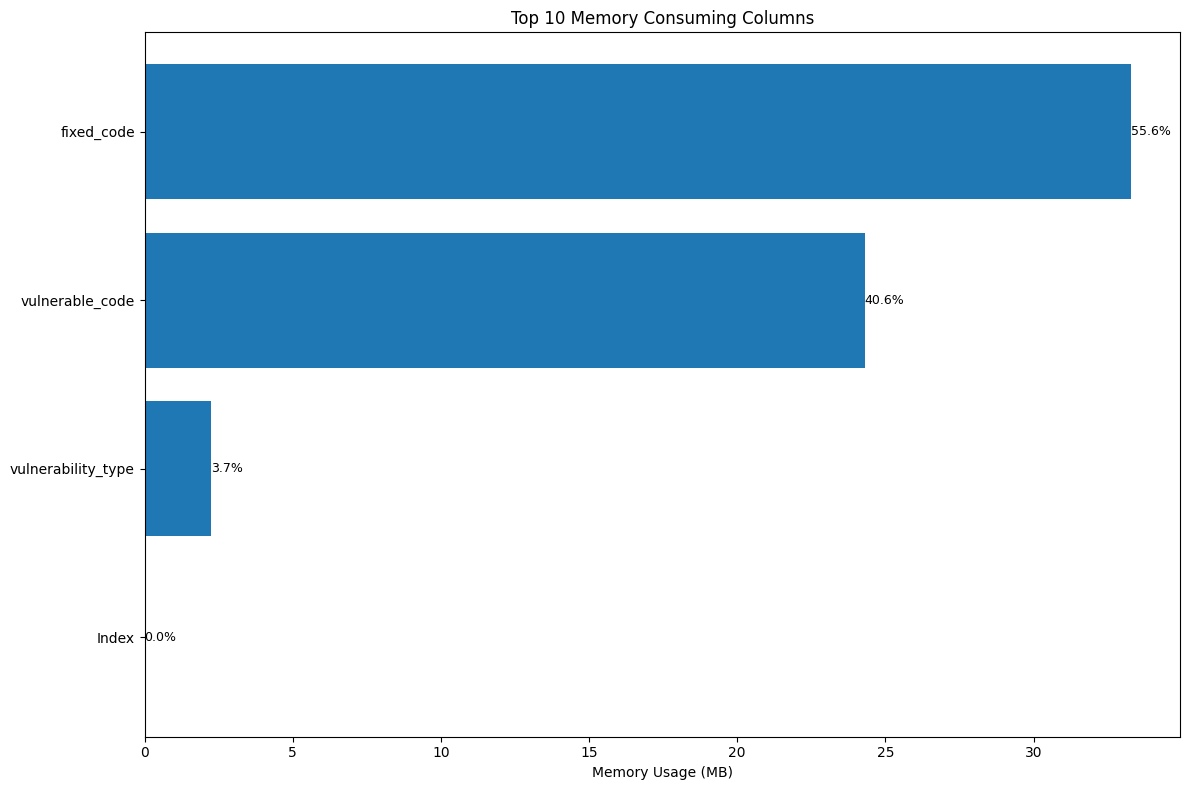

In [13]:
# Display detailed memory usage information
print("💾 DETAILED MEMORY USAGE INFORMATION")
print("=" * 50)

if df is not None:
    # Get memory usage for each column
    memory_usage = df.memory_usage(deep=True)
    memory_mb = memory_usage / 1024**2
    
    # Create memory usage dataframe
    memory_df = pd.DataFrame({
        'Column': ['Index'] + list(df.columns),
        'Memory (bytes)': memory_usage.values,
        'Memory (MB)': memory_mb.values,
        'Memory (%)': (memory_usage.values / memory_usage.sum()) * 100
    }).sort_values('Memory (bytes)', ascending=False)
    
    print(f"Total memory usage: {memory_usage.sum() / 1024**2:.2f} MB")
    print(f"Average memory per column: {memory_usage.mean() / 1024**2:.2f} MB")
    
    print(f"\nMemory usage by column:")
    print("-" * 50)
    display(memory_df.head(15))  # Show top 15 memory-consuming columns
    
    # Memory optimization suggestions
    print(f"\n🔧 MEMORY OPTIMIZATION SUGGESTIONS:")
    print("-" * 50)
    
    # Check for object columns that might be optimized
    object_cols = df.select_dtypes(include=['object']).columns
    if len(object_cols) > 0:
        print(f"• Consider converting object columns to categorical for memory savings:")
        for col in object_cols[:5]:
            unique_ratio = df[col].nunique() / len(df)
            if unique_ratio < 0.5:  # Less than 50% unique values
                current_memory = df[col].memory_usage(deep=True) / 1024**2
                print(f"  - {col}: {unique_ratio:.1%} unique values, {current_memory:.2f} MB")
    
    # Check for integer columns that might be downcasted
    int_cols = df.select_dtypes(include=['int64']).columns
    if len(int_cols) > 0:
        print(f"• Consider downcasting integer columns:")
        for col in int_cols[:3]:
            col_min, col_max = df[col].min(), df[col].max()
            if col_min >= 0 and col_max <= 255:
                print(f"  - {col}: Range {col_min}-{col_max}, could use uint8")
            elif col_min >= -128 and col_max <= 127:
                print(f"  - {col}: Range {col_min}-{col_max}, could use int8")
            elif col_min >= -32768 and col_max <= 32767:
                print(f"  - {col}: Range {col_min}-{col_max}, could use int16")
    
    # Check for float columns
    float_cols = df.select_dtypes(include=['float64']).columns
    if len(float_cols) > 0:
        print(f"• Consider using float32 instead of float64 for:")
        for col in float_cols[:3]:
            print(f"  - {col}")
            
    # Visualization of memory usage
    if len(memory_df) <= 20:  # Only plot if reasonable number of columns
        plt.figure(figsize=(12, 8))
        
        # Top memory consuming columns
        top_memory = memory_df.head(10)
        
        plt.barh(range(len(top_memory)), top_memory['Memory (MB)'])
        plt.yticks(range(len(top_memory)), top_memory['Column'])
        plt.xlabel('Memory Usage (MB)')
        plt.title('Top 10 Memory Consuming Columns')
        plt.gca().invert_yaxis()
        
        # Add percentage labels
        for i, (idx, row) in enumerate(top_memory.iterrows()):
            plt.text(row['Memory (MB)'], i, f'{row["Memory (%)"]:.1f}%', 
                    va='center', ha='left', fontsize=9)
        
        plt.tight_layout()
        plt.show()
        
else:
    print("❌ Dataset not loaded.")

## 11. Preprocessing

In [ ]:
import os
import re
import hashlib
import pickle
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

def tokenize_code(code: str):
    """
    Tokenize source code similarly to the project's existing tokenizer:
    - Remove comments
    - Map keywords/operators to normalized tokens
    - Map numbers/strings/identifiers to generalized tokens
    """
    if pd.isna(code) or not isinstance(code, str):
        return []

    # Remove line and block comments
    code = re.sub(r'//.*?$|/\*.*?\*/', '', code, flags=re.MULTILINE | re.DOTALL)

    # Keyword/operator map (aligned with existing approach)
    token_map = {
        # Keywords
        'if': 'KEYWORD_IF', 'else': 'KEYWORD_ELSE', 'for': 'KEYWORD_FOR',
        'while': 'KEYWORD_WHILE', 'return': 'KEYWORD_RETURN', 'switch': 'KEYWORD_SWITCH',
        'case': 'KEYWORD_CASE', 'break': 'KEYWORD_BREAK', 'continue': 'KEYWORD_CONTINUE',
        'try': 'KEYWORD_TRY', 'catch': 'KEYWORD_CATCH', 'finally': 'KEYWORD_FINALLY',
        'class': 'KEYWORD_CLASS', 'public': 'KEYWORD_PUBLIC', 'private': 'KEYWORD_PRIVATE',
        'protected': 'KEYWORD_PROTECTED', 'static': 'KEYWORD_STATIC', 'void': 'TYPE_VOID',
        'int': 'TYPE_INT', 'long': 'TYPE_LONG', 'short': 'TYPE_SHORT', 'char': 'TYPE_CHAR',
        'float': 'TYPE_FLOAT', 'double': 'TYPE_DOUBLE', 'boolean': 'TYPE_BOOL',
        'String': 'TYPE_STRING',

        # Operators
        '+': 'OP_PLUS', '-': 'OP_MINUS', '*': 'OP_MULTIPLY', '/': 'OP_DIVIDE',
        '=': 'OP_ASSIGN', '==': 'OP_EQUALS', '!=': 'OP_NOT_EQUALS',
        '<': 'OP_LESS', '>': 'OP_GREATER', '<=': 'OP_LESS_EQUALS',
        '>=': 'OP_GREATER_EQUALS', '&&': 'OP_AND', '||': 'OP_OR',
        '!': 'OP_NOT',

        # Delimiters
        '(': 'DELIM_LPAREN', ')': 'DELIM_RPAREN',
        '{': 'DELIM_LBRACE', '}': 'DELIM_RBRACE',
        '[': 'DELIM_LBRACKET', ']': 'DELIM_RBRACKET',
        ';': 'DELIM_SEMICOLON', ',': 'DELIM_COMMA', '.': 'DELIM_DOT',
    }

    # Token pattern similar to the existing pipeline
    pattern = r'[a-zA-Z_]\w*|".*?"|\'.*?\'|\d+|==|!=|<=|>=|&&|\|\||[+\-*/=<>!&|^%(){}\[\].,;:]'
    tokens = []

    for match in re.finditer(pattern, code):
        tok = match.group(0)
        if tok in token_map:
            tokens.append(token_map[tok])
        elif re.match(r'^[0-9]+$', tok):
            tokens.append('NUMBER')
        elif re.match(r'^".*"$|^\'.*\'$', tok):
            tokens.append('STRING_LITERAL')
        elif re.match(r'^[a-zA-Z_]\w*$', tok):
            tokens.append('IDENTIFIER')
        else:
            tokens.append('OTHER')

    return tokens

def preprocess_new_text_dataset(input_file_path: str, output_root: str):
    """
    Preprocess the new text dataset with columns:
      - vulnerability_type
      - vulnerable_code
      - fixed_code

    Produces files compatible with existing models:
      - processed_data/train_features.csv
      - processed_data/val_features.csv
      - processed_data/test_features.csv
      - processed_data/train_code_tokens.pkl
      - processed_data/val_code_tokens.pkl
      - processed_data/test_code_tokens.pkl
    Also saves duplicates for deep pipeline that looks for train_tokens.pkl:
      - processed_data/train_tokens.pkl
      - processed_data/val_tokens.pkl
      - processed_data/test_tokens.pkl
    """
    print("Starting preprocessing for the new dataset...")
    print(f"Loading CSV: {input_file_path}")

    df = pd.read_csv(input_file_path, low_memory=False)
    required = {'vulnerability_type', 'vulnerable_code', 'fixed_code'}
    missing = required - set(df.columns)
    if missing:
        raise ValueError(f"Input CSV missing columns: {missing}")

    print(f"Loaded {len(df)} rows")

    # Expand pairs into labeled samples
    print("Expanding pairs into labeled samples (vul=1 for vulnerable_code, vul=0 for fixed_code)...")
    vul_df = df[['vulnerability_type', 'vulnerable_code']].rename(columns={'vulnerable_code': 'code'})
    vul_df['vul'] = 1
    fix_df = df[['vulnerability_type', 'fixed_code']].rename(columns={'fixed_code': 'code'})
    fix_df['vul'] = 0

    all_df = pd.concat([vul_df, fix_df], axis=0, ignore_index=True)
    print(f"Expanded to {len(all_df)} samples. Vulnerable: {all_df['vul'].sum()}, Non-vulnerable: {len(all_df) - all_df['vul'].sum()}")

    # Tokenize code
    print("Tokenizing code...")
    all_df['code_tokens'] = all_df['code'].apply(tokenize_code)
    avg_tokens = all_df['code_tokens'].apply(len).mean()
    print(f"Average tokens per sample: {avg_tokens:.2f}")

    # Remove duplicates by token hash
    print("Removing duplicate samples by code token hash...")
    all_df['code_hash'] = all_df['code_tokens'].apply(lambda toks: hashlib.md5(" ".join(str(t) for t in toks).encode()).hexdigest())
    before = len(all_df)
    all_df = all_df.drop_duplicates(subset=['code_hash'])
    after = len(all_df)
    print(f"Removed {before - after} duplicates. Remaining: {after}")

    # Lightweight numeric features used by tree/XGB pipelines
    print("Extracting lightweight numeric features...")
    # Severity score absent; keep 0 as in existing pipeline fallback
    all_df['Score'] = 0.0
    # Basic code stats
    all_df['code_length'] = all_df['code'].apply(lambda x: len(str(x)) if isinstance(x, str) else 0)
    all_df['token_count'] = all_df['code_tokens'].apply(len)
    # Risky patterns flags
    all_df['has_malloc'] = all_df['code'].apply(lambda x: 1 if isinstance(x, str) and 'malloc' in x else 0)
    all_df['has_pointers'] = all_df['code'].apply(lambda x: 1 if isinstance(x, str) and '*' in x else 0)
    # Commit metadata not present; default to 0
    all_df['add_lines'] = 0
    all_df['del_lines'] = 0

    # Final feature columns (keep names consistent with project)
    feature_columns = [
        'vul',
        'Score',
        'code_length',
        'token_count',
        'has_malloc',
        'has_pointers',
        'add_lines',
        'del_lines',
    ]

    features_df = all_df[feature_columns].copy()
    for col in features_df.columns:
        if features_df[col].dtype in [np.float64, np.int64, np.int32, np.float32]:
            features_df[col] = features_df[col].fillna(0)

    print(f"Feature extraction complete. Total features (incl. target): {len(feature_columns)}")

    # Train/Val/Test split (stratified)
    print("Creating stratified train/val/test splits (70/15/15)...")
    X = features_df.drop('vul', axis=1)
    y = features_df['vul']

    X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.30, random_state=42, stratify=y)
    X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.50, random_state=42, stratify=y_temp)

    train_df = pd.concat([X_train, y_train], axis=1)
    val_df = pd.concat([X_val, y_val], axis=1)
    test_df = pd.concat([X_test, y_test], axis=1)

    print(f"Splits created:")
    print(f"  - Train: {len(train_df)} samples (vul={int(train_df['vul'].sum())})")
    print(f"  - Val:   {len(val_df)} samples (vul={int(val_df['vul'].sum())})")
    print(f"  - Test:  {len(test_df)} samples (vul={int(test_df['vul'].sum())})")

    # Output directory: new_processed_data under current project
    output_dir = os.path.join(output_root, 'new_processed_data')
    os.makedirs(output_dir, exist_ok=True)

    # Save feature CSVs
    train_features_path = os.path.join(output_dir, 'train_features.csv')
    val_features_path = os.path.join(output_dir, 'val_features.csv')
    test_features_path = os.path.join(output_dir, 'test_features.csv')

    train_df.to_csv(train_features_path, index=False)
    val_df.to_csv(val_features_path, index=False)
    test_df.to_csv(test_features_path, index=False)

    # Align token splits by indices
    train_indices = X_train.index
    val_indices = X_val.index
    test_indices = X_test.index

    train_tokens = all_df.loc[train_indices, ['code_tokens', 'vul']]
    val_tokens = all_df.loc[val_indices, ['code_tokens', 'vul']]
    test_tokens = all_df.loc[test_indices, ['code_tokens', 'vul']]

    # Save pickle files with both naming conventions to satisfy loaders
    paths_primary = {
        'train': os.path.join(output_dir, 'train_code_tokens.pkl'),
        'val': os.path.join(output_dir, 'val_code_tokens.pkl'),
        'test': os.path.join(output_dir, 'test_code_tokens.pkl'),
    }
    paths_legacy = {
        'train': os.path.join(output_dir, 'train_tokens.pkl'),
        'val': os.path.join(output_dir, 'val_tokens.pkl'),
        'test': os.path.join(output_dir, 'test_tokens.pkl'),
    }

    with open(paths_primary['train'], 'wb') as f:
        pickle.dump(train_tokens, f)
    with open(paths_primary['val'], 'wb') as f:
        pickle.dump(val_tokens, f)
    with open(paths_primary['test'], 'wb') as f:
        pickle.dump(test_tokens, f)

    # Also write legacy names for deep loader variants
    with open(paths_legacy['train'], 'wb') as f:
        pickle.dump(train_tokens, f)
    with open(paths_legacy['val'], 'wb') as f:
        pickle.dump(val_tokens, f)
    with open(paths_legacy['test'], 'wb') as f:
        pickle.dump(test_tokens, f)

    print("Preprocessing complete. Files saved:")
    print(f"  - {train_features_path}")
    print(f"  - {val_features_path}")
    print(f"  - {test_features_path}")
    print(f"  - {paths_primary['train']} (and {paths_legacy['train']})")
    print(f"  - {paths_primary['val']} (and {paths_legacy['val']})")
    print(f"  - {paths_primary['test']} (and {paths_legacy['test']})")

# Use the new dataset location
input_path = r"D:\ML lab\Ml-Project\new_dataset\vulnerability_fix_dataset.csv"
# Save processed files under current project in new_processed_data
output_root = r"D:\ML lab\Ml-Project"

preprocess_new_text_dataset(input_path, output_root)

Starting preprocessing for the new dataset...
Loading CSV: E:\dataset\archive\vulnerability_fix_dataset.csv
Loaded 35000 rows
Expanding pairs into labeled samples (vul=1 for vulnerable_code, vul=0 for fixed_code)...
Expanded to 70000 samples. Vulnerable: 35000, Non-vulnerable: 35000
Tokenizing code...
Loaded 35000 rows
Expanding pairs into labeled samples (vul=1 for vulnerable_code, vul=0 for fixed_code)...
Expanded to 70000 samples. Vulnerable: 35000, Non-vulnerable: 35000
Tokenizing code...
Average tokens per sample: 132.15
Removing duplicate samples by code token hash...
Average tokens per sample: 132.15
Removing duplicate samples by code token hash...
Removed 49473 duplicates. Remaining: 20527
Extracting lightweight numeric features...
Feature extraction complete. Total features (incl. target): 8
Creating stratified train/val/test splits (70/15/15)...
Splits created:
  - Train: 14368 samples (vul=2516)
  - Val:   3079 samples (vul=539)
  - Test:  3080 samples (vul=540)
Removed 4947